Multiple Regression
-------

![](https://cdn.meme.am/cache/instances/folder501/500x/65448501.jpg)

A company that makes carseats would like to construct a model to predict sales. 

The data is here: https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv 

It contains 400 observations on the following 11 variables:

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

-----

Load in datasets

In [2]:
import pandas as pd
import pandas.plotting

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
df.columns = map(str.lower, df.columns)
df.head()

,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
df2 = df.copy()
df2 = df.replace({'Yes': 1, 'No': 0, 'Bad': 0, 'Good': 2, 'Medium': 1})
df2.head()

,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


Visualize the data with the appropriate plots. 

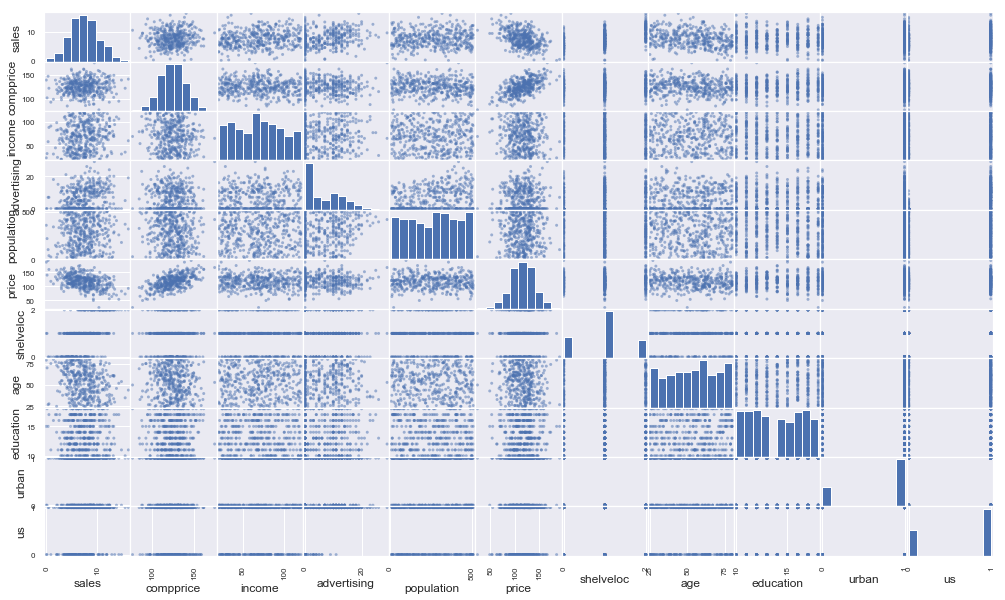

In [11]:
# For example
pd.plotting.scatter_matrix(df2, figsize=(17, 10), edgecolor='none', alpha=0.5);

In [12]:
import seaborn as sns
sns.set()

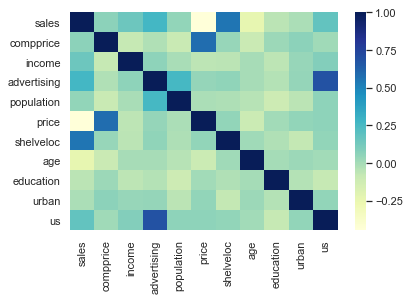

In [13]:
corr = df2.corr()
sns.heatmap(data = corr, cmap="YlGnBu");

What trends do you see in the data?

    relationship between selveloc and sales

Find the single best predictor for a simple linear regression.

<br>

<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [14]:
import statsmodels.api as sms

In [18]:
explanatory_vars = list(df2.columns)
explanatory_vars

['sales',
 'compprice',
 'income',
 'advertising',
 'population',
 'price',
 'shelveloc',
 'age',
 'education',
 'urban',
 'us']

In [41]:
print('R squared for each possible explanatory variable:' )
y = df2[['sales']]
for explanatory_var in explanatory_vars:
    X = df2[explanatory_var]
    X = sms.add_constant(X)
    rs = sms.OLS(y, X).fit().rsquared
    print(explanatory_var + ': ' + f'{rs:.3}')

R squared for each possible explanatory variable:
sales: 1.0
compprice: 0.00411
income: 0.0231
advertising: 0.0726
population: 0.00255
price: 0.198
shelveloc: 0.307
age: 0.0537
education: 0.0027
urban: 0.000238
us: 0.0314


Fit a the most possible multiple regression.

In [43]:
X = df2[['compprice','income','advertising','population','price','shelveloc','age','education','urban','us']]
y = df2[['sales']]
X = sms.add_constant(X)
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     252.9
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          2.15e-163
Time:                        16:05:45   Log-Likelihood:                -579.33
No. Observations:                 400   AIC:                             1181.
Df Residuals:                     389   BIC:                             1225.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4028      0.616      8.775      0.000       4.192       6.613
compprice       0.0926      0.004     21.775      0.000       0.084       0.101
income          0.0162      0.002      8.549      0.000       0.012       0.020
advertising     0.1204      0.011     10.574      0.000       0.098       0.143
population      0.0003      0.000      0.766      0.444      -0.000       0.001
price          -0.0952      0.003    -34.795      0.000      -0.101      -0.090
shelveloc       2.4116      0.078     30.760      0.000       2.257       2.566
age            -0.0469      0.003    -14.394      0.000      -0.053      -0.040
education      -0.0209      0.020     -1.036      0.301      -0.061       0.019
urban           0.1412      0.116      1.220      0.223      -0.086       0.369
us             -0.1293      0.153     -0.845      0.399      -0.430       0.172
==============================================================================
Omnibus:                        1.162   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.192
Skew:                           0.129   Prob(JB):                        0.551
Kurtosis:                       2.933   Cond. No.                     4.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How does the $R^2$ compare better best simple and most complex

In [51]:
X = df2[['compprice','income','advertising','price','shelveloc','age']]
y = df2[['sales']]
X = sms.add_constant(X)
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     420.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.26e-167
Time:                        16:23:34   Log-Likelihood:                -581.44
No. Observations:                 400   AIC:                             1177.
Df Residuals:                     393   BIC:                             1205.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2624      0.515     10.215      0.000       4.250       6.275
compprice       0.0923      0.004     21.853      0.000       0.084       0.101
income          0.0162      0.002      8.603      0.000       0.012       0.020
advertising     0.1164      0.008     14.711      0.000       0.101       0.132
price          -0.0952      0.003    -34.791      0.000      -0.101      -0.090
shelveloc       2.4031      0.078     30.790      0.000       2.250       2.557
age            -0.0469      0.003    -14.441      0.000      -0.053      -0.041
==============================================================================
Omnibus:                        1.110   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                1.189
Skew:                           0.121   Prob(JB):                        0.552
Kurtosis:                       2.888   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remove a couple of explanatory variables. How does $R^2$ change?

What is the best criteria for removing variables?

    we want to have a simple model so we want to have as low variables as possible. so we remove the variables that
    have the lowest correlation with sales

Repeated the process for the adjusted $R^2$ 

the adjusted $R^2$ stays the same in the most complex and the best model

Write a brief summary of results.

<br>

<details><summary>
Click here for a hint…
</summary>
Don't write every step. Just pick the most useful model.
</details>
   

In the best model we take the six variables with the highest correlation and get a good result for R-squared

<br>
<br> 
<br>

----